In [1]:
import re
import pandas as pd
import nltk
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
import os
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [2]:
def get_str(tup):
    if tup[0] == '':
        return tup[1]
    return tup[0]

In [3]:
df = pd.read_csv("postings.csv")

Step 1: Join all text together and investigate
Look around for "years experience"

In [4]:
text = [x for x in df["Text"] if type(x) is str  and x != ""]
text_str = " ".join(text)

Looking for X years ... to track experience

In [5]:
(re.findall("(\d+) (years) ([\s\w]+)", text_str))

[('3', 'years', 'alone across Federal'),
 ('1', 'years', 'min'),
 ('3', 'years', 'o 3'),
 ('5', 'years', 'o 5'),
 ('3', 'years', ' Education'),
 ('3', 'years', 'o 3'),
 ('5', 'years', 'o 5'),
 ('12', 'years', 'of relevant exempt experience'),
 ('8', 'years', 'of professional experience'),
 ('6', 'years', 'of professional experience with a related Masters degree'),
 ('3', 'years', 'of Executive Assistant work experience'),
 ('10', 'years', 'of experience in a software development'),
 ('7', 'years', 'of experience in management or a leadership role'),
 ('6', 'years', 'of related experience'),
 ('4', 'years', 'of related experience required'),
 ('2', 'years', 'of sales experience is required'),
 ('40', 'years', 'of field'),
 ('5', 'years', 'experience in the education field '),
 ('5', 'years', 'of experience in a related field OR MS'),
 ('4', 'years', 'of experience in a related field'),
 ('15', 'years', 'and is growing rapidly'),
 ('5', 'years', 'of relevant technical or business work ex

Task: Explore most common words in text and titles

In [6]:
text_dist = nltk.FreqDist()
stopwords = nltk.corpus.stopwords.words('english') 

for sentence in nltk.tokenize.sent_tokenize(text_str):
    for word in nltk.tokenize.word_tokenize(sentence):
        if word not in stopwords and word.isalnum():
            text_dist[word.lower()] += 1

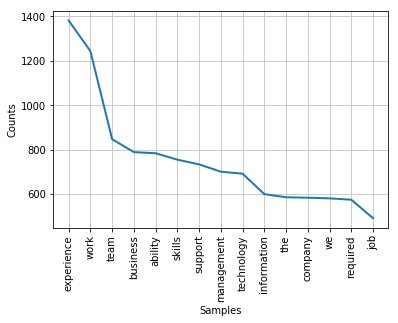

In [7]:
text_dist.plot(15,cumulative=False)

In [8]:
titles = [x for x in df["Title"] if type(x) is str and x != ""]
title_str = " ".join(titles)

In [9]:
title_dist = nltk.FreqDist()

for sentence in nltk.tokenize.sent_tokenize(title_str):
    for word in nltk.tokenize.word_tokenize(sentence):
        if word.lower() not in stopwords + ["technology"] and word.isalnum():
            title_dist[word.lower()] += 1

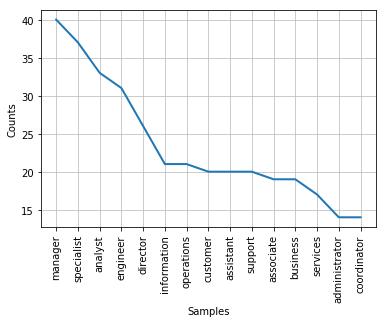

In [10]:
title_dist.plot(15, cumulative=False)

Task: Read through files and generate word count vectorizer to distinguish job listings

In [11]:
all_text = df["Text"]

In [12]:
cv = CountVectorizer(ngram_range=(3,3),max_features=10000)
X = cv.fit_transform(all_text)
X_arr = X.toarray()
X_arr.shape

(393, 10000)

Make sure shape matches how many entries. We have lost around 25 of 313 entries due to missing data 

In [13]:
pca = PCA(2)  
projected = pca.fit_transform(X_arr)

In [14]:
colors = {'Accountability Technology':'blue',
 'Compliance Technology':'red',
 'Diversity Technology':'green',
 'Educational Technology':'orange',
 'Emerging Technology':'violet',
 'Equality Technology':'indigo',
 'Equity Technology':'yellow',
 'Ethics Technology':'pink',
 'Inclusion Technology':'brown',
 'Policy Technology':'crimson',
 'Privacy Technology': 'gold',
 'Responsible Technology':'silver',
 'Trust Technology':'black'}

Text(0, 0.5, 'component 2')

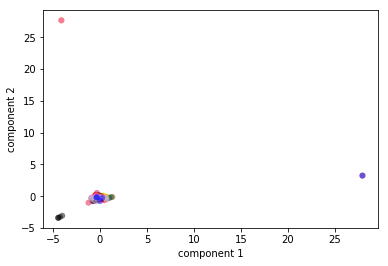

In [15]:
plt.scatter(projected[:, 0], projected[:, 1], c=df["Search_Term"].apply(lambda x: colors[x]),edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

Text(0, 0.5, 'component 2')

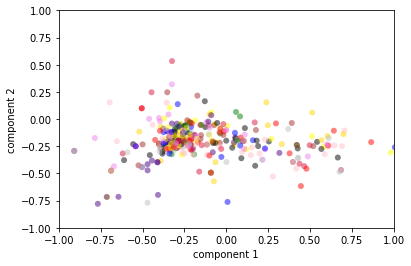

In [16]:
plt.axis([-1, 1, -1, 1])
plt.scatter(projected[:, 0], projected[:, 1], c=df["Search_Term"].apply(lambda x: colors[x]),edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

In [17]:
print(list(projected[:, 0]).index(max(projected[:, 0])))
print(list(projected[:, 1]).index(max(projected[:, 1])))

80
287


Listings 80 and 96 are outliers!

In [18]:
new_projected = np.array([np.array(x) for x in projected if x[0] < 5 and x[1] < 5])
grid_colors = []
x_avg = statistics.mean(new_projected[:, 0])
y_avg = statistics.mean(new_projected[:, 1])

for pair in new_projected:
    first = float(pair[0])
    second = float(pair[1])
    if first < x_avg and second < y_avg:
        grid_colors.append("red")
    elif first < x_avg and second > y_avg:
        grid_colors.append("green")
    elif first > x_avg and second > y_avg:
        grid_colors.append("blue")
    else:
        grid_colors.append("yellow")                    

Text(0, 0.5, 'component 2')

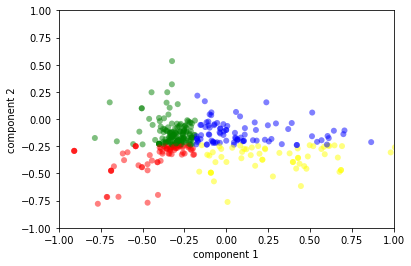

In [19]:
plt.axis([-1, 1, -1, 1])
plt.scatter(new_projected[:, 0], new_projected[:, 1], c=grid_colors,edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

Repeat above steps with tf-idf method

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(ngram_range=(3,3),max_features=10000)
X = tv.fit_transform(all_text)
X_arr = X.toarray()
X_arr.shape

(393, 10000)

In [21]:
pca = PCA(2)  
projected = pca.fit_transform(X_arr)

Text(0, 0.5, 'component 2')

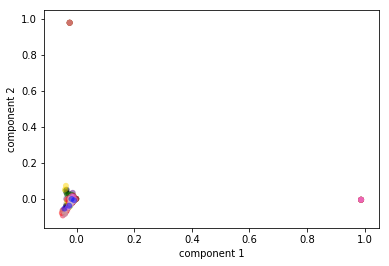

In [22]:
plt.scatter(projected[:, 0], projected[:, 1], c=df["Search_Term"].apply(lambda x: colors[x]),edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

Text(0, 0.5, 'component 2')

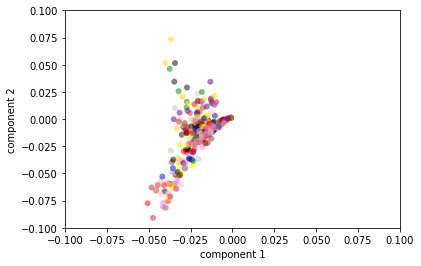

In [23]:
plt.axis([-.1, .1, -.1, .1])
plt.scatter(projected[:, 0], projected[:, 1], c=df["Search_Term"].apply(lambda x: colors[x]),edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

In [24]:
df["Title"][96]

'Patient Financial Navigator'

In [25]:
df["Company"][96]

'iRhythm'

In [26]:
df

,Company,Date_Queried,Education,Location,Platform,Search_Term,Text,Title,URL,Unnamed: 0,Unnamed: 0.1
0,Xentity Corporation,7/30/2020,Bachelor's,"Golden, CO",Indeed,Trust Technology,"Junior GIS Data Engineer Golden, CO (must be l...",Junior GIS Data Engineer,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,0.0,0.0
1,T-Mobile,7/30/2020,Bachelor's Master's,"Atlanta, GA",Indeed,Trust Technology,"Responsible for planning, leading, organizing,...",Manager Software Development- Product & Techno...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,1.0,1.0
2,Vector Talent Resources,7/30/2020,Bachelor's,"Washington, DC",Indeed,Trust Technology,VECTOR TALENT RESOURCES Title: Windows System ...,Windows System Administrator with Public Trust...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,2.0,2.0
3,Trek Bicycle,7/30/2020,NaN,"San Rafael, CA",Indeed,Trust Technology,A bit about us Trek is an awesome place to wor...,Bicycle Mechanic,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,3.0,3.0
4,Bank of Holland,7/30/2020,Bachelor's,"East Aurora, NY",Indeed,Trust Technology,Role: Responsible the general oversight and su...,Information Technology Coordinator,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,4.0,4.0
5,YouTube,7/30/2020,Bachelor's,"San Bruno, CA",Indeed,Trust Technology,Minimum qualifications: Bachelor's degree or e...,"Escalations Specialist, YouTube Trust and Safety",https://www.indeed.com/rc/clk?jk=152410f43f557...,5.0,5.0
6,Phillips 66,7/30/2020,NaN,United States,Indeed,Trust Technology,Software Engineering Cloud Engineering Site Re...,2021 University Intern - Information Technology,https://www.indeed.com/rc/clk?jk=a92ddc2455863...,6.0,6.0
7,Hendrick Automotive Group,7/30/2020,High School Bachelor's Master's,"El Cerrito, CA",Indeed,Trust Technology,Summary: Sells new or used vehicles at a prof...,Sales Person,https://www.indeed.com/rc/clk?jk=45b69742bdf4a...,7.0,7.0
8,Wayfair,7/30/2020,NaN,Remote,Indeed,Trust Technology,"At Wayfair, we care about our customers! Our a...","Senior Customer Service Manager, Remote",https://www.indeed.com/rc/clk?jk=214ced2ecde48...,8.0,8.0
9,Pacific Wholesale Mortgage,7/30/2020,NaN,"Walnut Creek, CA",Indeed,Trust Technology,Unique opportunity in your local Mortgage Mark...,Mortgage Loan Officer Apprentice,https://www.indeed.com/rc/clk?jk=44033b64065c5...,9.0,9.0
